### Logistic Regression for Classification

### Why Logistic Regression?

Logistic regression is a widely used statistical method for binary classification problems, where the outcome variable is categorical and has only two possible values (in this case, "Attrition" or "No Attrition"). Logistic regression is particularly suitable for this dataset for the following reasons:

1. The dataset contains a binary target variable (Attrition) that I want to predict. Logistic regression is specifically designed for binary classification problems and can efficiently model the probability of an event occurring, which is exactly what I want to do in this case.

2. Logistic regression is relatively simple and computationally efficient, which makes it an excellent choice for modeling small-to-medium sized datasets such as this one. It does not require a large number of input variables, and can handle categorical variables as well as numerical variables.

Logistic regression is a suitable choice for predicting employee attrition in this dataset because it is a simple, interpretable, and efficient method that can model the probability of a binary event occurring.

### Scenario:

This task is aimed at predicting the employees attrition (if employee would stay(yes) or leave (No) the organization) based on the past HR data containing 35 (columns) different information about employee.

Importing required libraries, importing the HR_Analytics.csv data and printing the first 5 rows

In [ ]:
# Import the required libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
data = pd.read_csv("HR_Analytics.csv")
data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


This shows that there are 35 columns in the dataset. Next, I am checking the total number of roles in the data and select columns that are relevant for the classification model

In [ ]:
len(data)

1470

In [ ]:
# Select the relevant features for the classification model
features = ['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
            'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
            'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
            'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
            'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
            'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
            'YearsSinceLastPromotion', 'YearsWithCurrManager']

Here, I intend to separate the relevant data from the entire data by creating a new that that will contain only the selected columns, and also add my target variable (Attrition) to the new data. Then I will print the first few rows to see what the data looks like.

In [ ]:
# Create a dataframe with the selected features and the target variable
data = data[features + ['Attrition']]
data.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,...,1,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,...,4,1,10,3,3,10,7,1,7,No
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,...,2,0,7,3,3,0,0,0,0,Yes
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,...,3,0,8,3,3,8,7,3,0,No
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,...,4,1,6,3,3,2,2,2,2,No


Next thing is to convert the non-numeric (categorical) features such as BusinessTravel, Department, EducationField e.t.c into numeric values, including attrition. I printed the new data to see that the data has been converted. The panda's 'get_dummies' uses One-hot encoding by default. this type of encoding transpose rows category into columns leading to more number of columns. By printing the first few rows, the number of columns must have increased from 31. Scroll to the last column, it has changed yes to 1 and No to 0 for attrition column.

In [ ]:
# Convert categorical variables into dummy variables
data = pd.get_dummies(data, drop_first=True)
data.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Attrition_Yes
0,41,1102,1,2,2,94,3,2,4,5993,...,0,0,0,0,1,0,0,1,1,1
1,49,279,8,1,3,61,2,2,2,5130,...,0,0,0,1,0,0,1,0,0,0
2,37,1373,2,2,4,92,2,1,3,2090,...,0,0,0,0,0,0,0,1,1,1
3,33,1392,3,4,4,56,3,1,3,2909,...,0,0,0,1,0,0,1,0,1,0
4,27,591,2,1,1,40,3,1,2,3468,...,0,0,0,0,0,0,1,0,0,0


Preparing dataset for the model. Separating the data to train (70%) and test (20%). X_train and X_test denotes inputs variables data (Every other columns except attrition) for training and testing while y_train and y_test are target variables data for training and testing respectively. The random_state is to lock the process, that is running the codes again will not produce a different result, it could be any number.

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('Attrition_Yes', axis=1),
                                                    data['Attrition_Yes'],
                                                    test_size=0.2, random_state=42)

Testing and fitting the logistic regression

In [ ]:
# Create a logistic regression model
logreg = LogisticRegression()

In [ ]:
# Train the model on the training data
logreg.fit(X_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Predict the target variable on the testing data
y_pred = logreg.predict(X_test)

Evaluating the model performance using accuracy and confusion matrix.

In [ ]:
# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

In [ ]:
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.8639455782312925
Confusion Matrix:
 [[253   2]
 [ 38   1]]


Visualizing the confusion matrix.

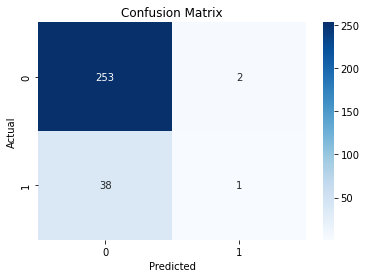

In [ ]:
# Import the required libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix as a heatmap
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='g')

# Add labels and title to the plot
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
old = len (y_train)
new = len(y_test)
print("Total number of data used to train the model:", old)
print("Total number of data used to test the model:", new)

Total number of data used to train the model: 1176
Total number of data used to test the model: 294


The 20% of the total data was splitted and used 70% to train. The number of observations from the confusion matrix is 253+2+38+1=294

#### Explanation
The confusion matrix above is a 2x2 matrix that shows the following:

The top-left cell represents the number of true negatives (TN), which is the number of employees who were correctly predicted to not have attrition. In this case, the number of true negatives is 253.

The top-right cell represents the number of false positives (FP), which is the number of employees who were predicted to have attrition but actually did not. In this case, the number of false positives is 2.

The bottom-left cell represents the number of false negatives (FN), which is the number of employees who were predicted to not have attrition but actually did. In this case, the number of false negatives is 38.

The bottom-right cell represents the number of true positives (TP), which is the number of employees who were correctly predicted to have attrition. In this case, the number of true positives is 1.

In summary, the confusion matrix shows that the logistic regression model correctly predicted that 253 employees did not have attrition (true negatives) and correctly predicted that only 1 employee had attrition (true positives). However, the model also made 2 false positive predictions (employees who were predicted to have attrition but actually did not) and 38 false negative predictions (employees who were predicted to not have attrition but actually did).


##### Other relevant visualizations to evaluate the model performance

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, precision_recall_curve, auc
from sklearn.inspection import permutation_importance

The chart below is a class distribution plot that compares the frequency of predicted and actual class labels in the test data. The interpretation is similar to confusion matrix. The bars shows the frequency and the extent at which the model is accurate, for the left bar shows that the blue at the top is what remains for the model to accurately predict the (no attrition), while the right bar shows that it accurately pridict yes (attrition).

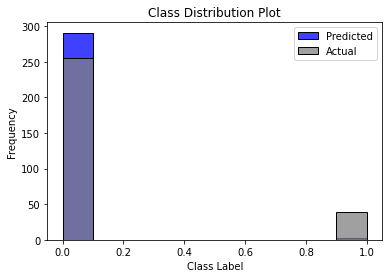

In [ ]:
# Plot the class distribution plot
sns.histplot(data=y_pred, kde=False, color='blue', label='Predicted')
sns.histplot(data=y_test, kde=False, color='gray', label='Actual')
plt.xlabel('Class Label')
plt.ylabel('Frequency')
plt.title('Class Distribution Plot')
plt.legend(loc='upper right')
plt.show()

The chart below shows the important features that determines the employee attrition

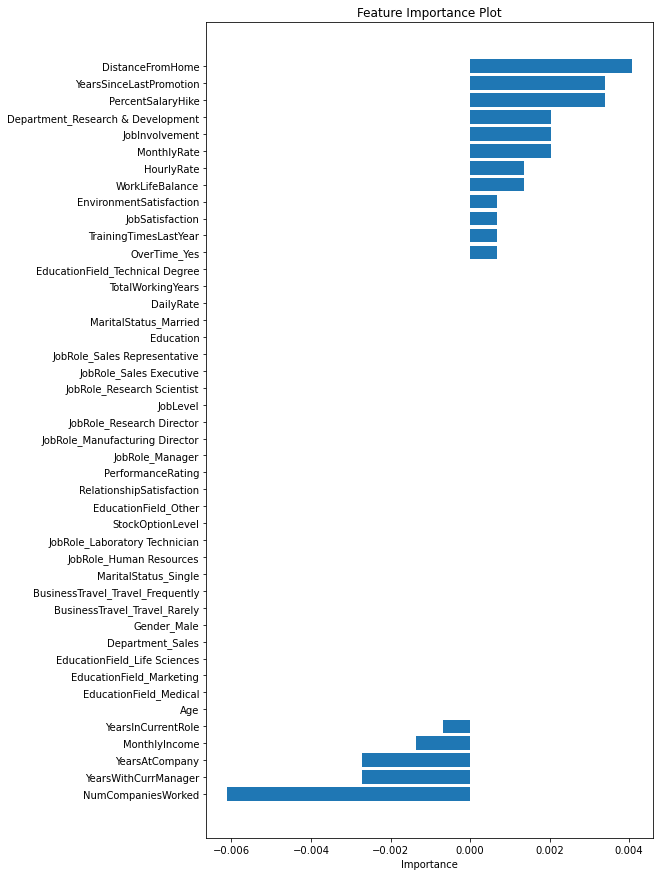

In [ ]:
# Plot the feature importance plot
importances = permutation_importance(logreg, X_test, y_test)
sorted_idx = importances.importances_mean.argsort()
plt.figure(figsize=(8, 15))
plt.barh(range(X_test.shape[1]), importances.importances_mean[sorted_idx])
plt.yticks(range(X_test.shape[1]), X_test.columns[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature Importance Plot')
plt.show()

The chart below is the decision boundary plot that can provide HR managers with insights on identifying the possibility of employee attrition. The chart indicates that while almost all the employee is likely to leave (0), the predicted to stay (1) would be employee with working years between 5 to 7 and monthly inclome around 2,500.

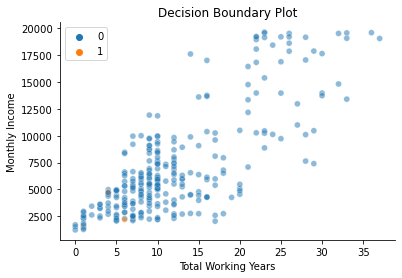

In [ ]:
# Plot the decision boundary plot
sns.scatterplot(x=X_test['TotalWorkingYears'], y=X_test['MonthlyIncome'], hue=y_pred, alpha=0.5)
sns.despine()
plt.xlabel('Total Working Years')
plt.ylabel('Monthly Income')
plt.title('Decision Boundary Plot')
plt.show()